In [124]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import functools
import matplotlib.pyplot as plt
import traceback 
import contextlib

In [125]:
bladder_cancer = pd.read_csv('bladder_cancer.csv')

x = pd.DataFrame(bladder_cancer, columns=['Amp_1MHz', 'Phase_1MHz', 'Amp_500kHz', 'Phase_500kHz', 'Amp_100kHz', 'Phase_100kHz', 'Amp_50kHz', 'Phase_50kHz', 'Amp_10kHz', 'Phase_10kHz'])

y = pd.DataFrame(bladder_cancer, columns=['Label'])

x_mean = x.mean()
x_std = x.std()
x = (x-x_mean)/x_std

x_data, x_test, y_data, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, random_state=1) 
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
x_train

array([[-7.02122592e-01,  8.76917911e-01,  1.30895130e+00,  2.16819831e-01,  4.67303759e-01,  4.08412211e-01, -1.08928773e+00,  2.98370074e-01,  3.86729783e-01,  1.24145329e-02],
       [-2.75649426e+00,  1.09072906e+00, -8.93995740e-01,  4.87755758e-01,  2.04579840e-01, -1.12222012e+00, -1.53393174e-01,  1.70620166e-01, -5.80088617e-01,  6.80770637e-01],
       [ 2.45325152e-01, -3.86332256e-01, -5.86491578e-01, -3.69342367e-01, -4.72445126e-01,  5.46713126e-01, -1.27606742e-01,  3.70281411e-01, -1.44227513e+00,  1.10491147e+00],
       [-2.48209965e-01, -5.12377038e-01,  1.54415117e+00, -8.47465946e-02, -1.67295060e-01,  1.08034257e+00, -2.79642140e-02, -9.63120984e-02,  7.99380170e-01,  1.55951348e-01],
       [-6.62251577e-01, -1.19690427e+00, -6.77930326e-02, -3.22068364e-01,  1.03565765e+00, -8.86902204e-01, -1.77323747e+00,  2.46255132e-01, -7.79122423e-02, -1.57330963e+00],
       [ 2.50750743e-01,  1.26994885e-02, -1.04408948e+00,  1.94608702e+00,  1.57229714e+00,  4.02948631e

In [126]:
print("훈련 샘플: {}, 레이블: {}".format(len(x_train), len(y_train)))

훈련 샘플: 169, 레이블: 169


In [127]:
model = tf.keras.Sequential([
   
   layers.Dense(8, activation='relu'),
   layers.Dense(8, activation='relu'),
   layers.Dense(1, activation='sigmoid')

])

model.compile(loss= 'binary_crossentropy',
                optimizer = tf.optimizers.Adam(),
                metrics=['accuracy'])

In [128]:
history = model.fit(x_train, y_train, epochs=100, batch_size=10, validation_data=(x_val, y_val), verbose=1)

Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 0.7467 - accuracy: 0.4556 - val_loss: 0.7051 - val_accuracy: 0.4884
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.7208 - accuracy: 0.4852 - val_loss: 0.6896 - val_accuracy: 0.5814
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6990 - accuracy: 0.5266 - val_loss: 0.6748 - val_accuracy: 0.6279
Epoch 4/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5621 - val_loss: 0.6612 - val_accuracy: 0.6512
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6611 - accuracy: 0.5917 - val_loss: 0.6489 - val_accuracy: 0.7442
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.5976 - val_loss: 0.6370 - val_accuracy: 0.7442
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.6282 - accuracy: 0.6509 - val_loss: 0.6260 - val_accuracy: 0.7674
Epoch 8/100
1

In [129]:
model.evaluate(x_train,  y_train, verbose=2)
model.evaluate(x_val,  y_val, verbose=2)
model.evaluate(x_test,  y_test, verbose=2)

6/6 - 0s - loss: 0.1112 - accuracy: 0.9763 - 14ms/epoch - 2ms/step
2/2 - 0s - loss: 0.3245 - accuracy: 0.8140 - 13ms/epoch - 7ms/step
1/1 - 0s - loss: 0.2749 - accuracy: 0.8750 - 12ms/epoch - 12ms/step


[0.27487805485725403, 0.875]

In [130]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

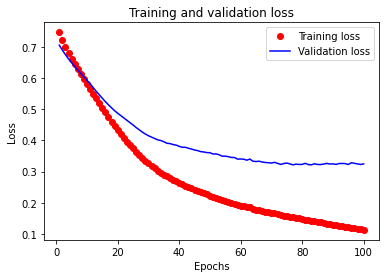

In [131]:


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'ro', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

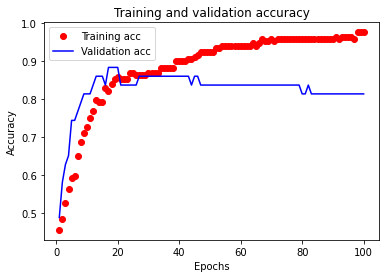

In [132]:
plt.clf()  

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()